We can create variables using typical assignment operator '='
Under the hood variables hold references to literals.

In [1]:
a = 10

10

In [2]:
b = 15.3

15.3

In [3]:
simple_sum = a+b

25.3

In [4]:
simple_math_function = exp(b)

4.4127118923504455e6

We can use functions to initialise variables

In [5]:
c = linspace(1,10,10)

linspace(1.0,10.0,10)

In [6]:
d = ones(4)

4-element Array{Float64,1}:
 1.0
 1.0
 1.0
 1.0

In [7]:
A = rand(4,4)

4x4 Array{Float64,2}:
 0.637437  0.739726   0.189319  0.275779 
 0.309787  0.0639646  0.586475  0.0414455
 0.215599  0.877233   0.42396   0.0308213
 0.471687  0.363446   0.899576  0.69237  

Array indexing is from 1, not from 0.
The final element is 'end' (similar to matlab).
Negative indexing does not exist.
Slicing and broadcasting do work.

In [8]:
A[1]

0.6374370545201185

In [9]:
A[0]

LoadError: LoadError: BoundsError: attempt to access 4x4 Array{Float64,2}:
 0.637437  0.739726   0.189319  0.275779 
 0.309787  0.0639646  0.586475  0.0414455
 0.215599  0.877233   0.42396   0.0308213
 0.471687  0.363446   0.899576  0.69237  
  at index [0]
while loading In[9], in expression starting on line 1

In [10]:
A[end]

0.6923695054075336

In [11]:
A[-1]

LoadError: LoadError: BoundsError: attempt to access 4x4 Array{Float64,2}:
 0.637437  0.739726   0.189319  0.275779 
 0.309787  0.0639646  0.586475  0.0414455
 0.215599  0.877233   0.42396   0.0308213
 0.471687  0.363446   0.899576  0.69237  
  at index [-1]
while loading In[11], in expression starting on line 1

In [12]:
A[1:2:end,1:2:end]

2x2 Array{Float64,2}:
 0.637437  0.189319
 0.215599  0.42396 

We can do various types of loops

In [13]:
g = true

true

In [14]:
#g = true
while(g)
    a += 1;
    if (rand()<0.05)
        g = false;
    end
    print(a,"\n");
end

11
12
13
14
15
16


In [15]:
for (el in A)
    print(el,"\n")
end

0.6374370545201185
0.30978693249108646
0.21559943567911155
0.4716871176849655
0.7397261004984375
0.06396458969942853
0.8772329222235096
0.3634455932699894
0.18931929679804682
0.5864749011488026
0.42395981997720944
0.8995756780941475
0.27577909368201703
0.041445509533803326
0.030821278499895577
0.6923695054075336


In [16]:
print("before ",d)

for (i=1:length(d))
    d[i] += (i % 3)
end

print("\nafter  ",d)

before [1.0,1.0,1.0,1.0]
after  [2.0,3.0,1.0,2.0]

Functions are an interesting place to begin to consider data types

In [17]:
# this is a comment, let's make a function
function foo(bb)
    print("Generic function foo()\n")
    print("Argument value = ",bb,"\n")
end

foo (generic function with 1 method)

In [18]:
foo(a)

Generic function foo()
Argument value = 16


In [19]:
typeof(a)

Int64

In [20]:
# let's make a function that takes floats only
function foo(bb::Float64)
    print("That was a float!\n");
    print("Argument value = ",bb,"\n");
end

foo (generic function with 2 methods)

In [21]:
?print # there is an online help system

search: print println print_joined print_escaped print_shortest print_unescaped



```
print(x)
```

Write (to the default output stream) a canonical (un-decorated) text representation of a value if there is one, otherwise call `show`. The representation used by `print` includes minimal formatting and tries to avoid Julia-specific details.


In [22]:
?foo

search: foo floor ifloor pointer_from_objref OverflowError RoundFromZero



No documentation found.

`foo` is a generic `Function`.

```julia
# 2 methods for generic function "foo":
foo(bb::Float64) at In[20]:3
foo(bb) at In[17]:3
```


In [23]:
print("First call foo() on a=$a \n") #interpolated string
foo(a)
print("\nNow with a float, b=$b\n")
foo(b)

First call foo() on a=16 
Generic function foo()
Argument value = 16

Now with a float, b=15.3
That was a float!
Argument value = 15.3


Functions are pass by reference, which makes calls almost cost-free, but it means that variables changed
within a function don't maintain the changes upon function exit.

Arrays however contain references to their base variables within them, and so the pattern of access dictates whether those base value changes are maintained or not.

In [24]:
function bar(d)
    print("Upon entering function ",d,"\n");
    d += 45;
    print("Leaving function ",d,"\n");
end

bar (generic function with 1 method)

In [25]:
print(a,"\n")
bar(a)
print(a,"\n")

16
Upon entering function 16
Leaving function 61
16


In [26]:
print(d,"\n")
bar(d)
print(d,"\n")

[2.0,3.0,1.0,2.0]
Upon entering function [2.0,3.0,1.0,2.0]
Leaving function [47.0,48.0,46.0,47.0]
[2.0,3.0,1.0,2.0]


In [27]:
# now if we change how the matrix elements are accessed within the function
function bar2(d)
    print("Upon entering function ",d,"\n");
    for (i=1:length(d))
        d[i] += 45;
    end
    print("Leaving function ",d,"\n");
end

bar2 (generic function with 1 method)

In [28]:
print(d,"\n")
bar2(d)
print(d,"\n")

[2.0,3.0,1.0,2.0]
Upon entering function [2.0,3.0,1.0,2.0]
Leaving function [47.0,48.0,46.0,47.0]
[47.0,48.0,46.0,47.0]


In [29]:
typeof(d)

Array{Float64,1}

In [30]:
function bar(d::Array{Float64,1})
    bar2(d);
end

bar (generic function with 2 methods)

In [31]:
methods(bar)

# 2 methods for generic function "bar":
bar(d::Array{Float64,1}) at In[30]:2
bar(d) at In[24]:2

In [32]:
methods(bar2)

# 1 method for generic function "bar2":
bar2(d) at In[27]:3

In [33]:
print(d,"\n")
bar(d)
print(d,"\n")

[47.0,48.0,46.0,47.0]
Upon entering function [47.0,48.0,46.0,47.0]
Leaving function [92.0,93.0,91.0,92.0]
[92.0,93.0,91.0,92.0]


In [34]:
print(a,"\n")
bar(a)
print(a,"\n")

16
Upon entering function 16
Leaving function 61
16


Visualisation and calling a Python Library

In [35]:
using PyPlot

/Users/davidhiggins/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [36]:
x = linspace(-2π,2π,101);
y = sin(x);

In [37]:
x

linspace(-6.283185307179586,6.283185307179586,101)

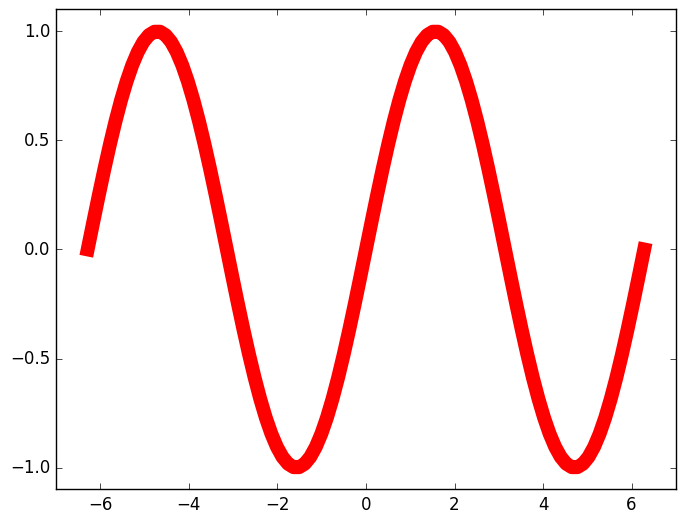

4-element Array{Float64,1}:
 -7.0
  7.0
 -1.1
  1.1

In [38]:
plot(x,y,"r",linewidth=10)
axis([-7,7,-1.1,1.1])

DataFrames are the Julia equivalent to Pandas

In [39]:
using DataFrames

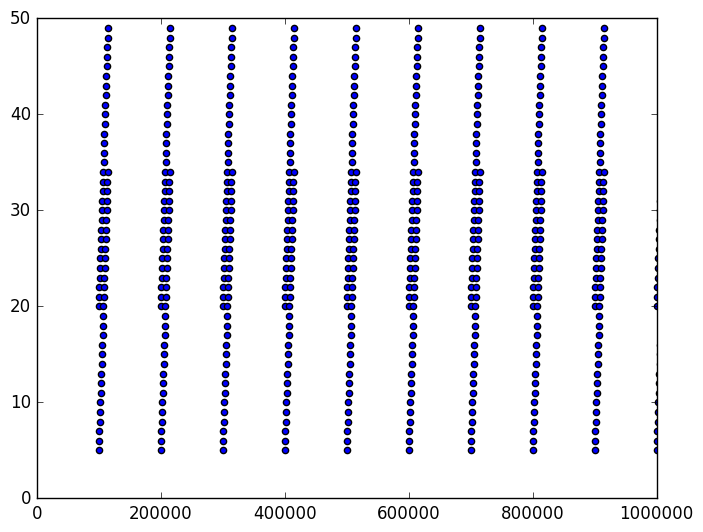

4-element Array{Int64,1}:
       0
 1000000
       0
      50

In [40]:
df = readtable("raster.dat", header=false, commentmark='#', allowcomments=true, separator = ' ')
figure()
scatter(df[1],df[2])
axis([0,1000000,0,50])

In [41]:
df.colindex
df.columns

3-element Array{Any,1}:
 [100003,100103,100503,100603,101003,101103,101503,101603,102003,102103  …  17913507,17913507,17913507,17913507,17913507,17913508,17913508,17913508,17913508,17913509]
 [5,20,6,21,7,22,8,23,9,24  …  17,26,27,36,45,12,13,16,28,14]                                                                                                         
 [1.00003,1.00103,1.00503,1.00603,1.01003,1.01103,1.01503,1.01603,1.02003,1.02103  …  0.02399,0.02397,0.02397,0.02397,0.02401,0.02399,0.02398,0.02401,0.02397,0.02398]

In [42]:
df

,x1,x2,x3
1,100003,5,1.00003
2,100103,20,1.00103
3,100503,6,1.00503
4,100603,21,1.00603
5,101003,7,1.01003
6,101103,22,1.01103
7,101503,8,1.01503
8,101603,23,1.01603
9,102003,9,1.02003
10,102103,24,1.02103


In [43]:
typeof(df)

DataFrames.DataFrame

In [44]:
names(df)

3-element Array{Symbol,1}:
 :x1
 :x2
 :x3

In [45]:
size(df)

(43489,3)

In [46]:
showcols(df)

43489×3 DataFrames.DataFrame
│ Col # │ Name │ Eltype  │ Missing │
├───────┼──────┼─────────┼─────────┤
│ 1     │ x1   │ Int64   │ 0       │
│ 2     │ x2   │ Int64   │ 0       │
│ 3     │ x3   │ Float64 │ 0       │

In [47]:
df[:x2] #column with label x2

43489-element DataArrays.DataArray{Int64,1}:
  5
 20
  6
 21
  7
 22
  8
 23
  9
 24
 10
 25
 11
  ⋮
 11
 15
 17
 26
 27
 36
 45
 12
 13
 16
 28
 14

In [48]:
df[df[:x2].>10,:] # boolean based selection

,x1,x2,x3
1,100103,20,1.00103
2,100603,21,1.00603
3,101103,22,1.01103
4,101603,23,1.01603
5,102103,24,1.02103
6,102603,25,1.02603
7,103003,11,1.03003
8,103103,26,1.03103
9,103503,12,1.03503
10,103603,27,1.03603


In [49]:
colwise(mean,df) # get the mean of each column

3-element Array{Any,1}:
 [1.0666886826461865e7]
 [27.984501828048472]  
 [0.18535279449975867] 

In [50]:
describe(df)

x1
Min      100003.0
1st Qu.  7.204506e6
Median   1.0802106e7
Mean     1.0666886826461865e7
3rd Qu.  1.4400008e7
Max      1.7913509e7
NAs      0
NA%      0.0%

x2
Min      5.0
1st Qu.  17.0
Median   28.0
Mean     27.984501828048472
3rd Qu.  39.0
Max      49.0
NAs      0
NA%      0.0%

x3
Min      0.02006
1st Qu.  0.02101
Median   0.02398
Mean     0.18535279449975867
3rd Qu.  0.02402
Max      1.14603
NAs      0
NA%      0.0%



Code introspection

In [51]:
function goo(a)
    print("In generic function goo\n");
    a += 1;
end

goo (generic function with 1 method)

In [52]:
@code_lowered goo(1)

1-element Array{Any,1}:
 :($(Expr(:lambda, Any[:a], Any[Any[Any[:a,:Any,18]],Any[],1,Any[]], :(begin  # In[51], line 2:
        (Main.print)("In generic function goo\n") # In[51], line 3:
        GenSym(0) = a + 1
        a = GenSym(0)
        return GenSym(0)
    end))))

In [53]:
@code_lowered goo(1.0)

1-element Array{Any,1}:
 :($(Expr(:lambda, Any[:a], Any[Any[Any[:a,:Any,18]],Any[],1,Any[]], :(begin  # In[51], line 2:
        (Main.print)("In generic function goo\n") # In[51], line 3:
        GenSym(0) = a + 1
        a = GenSym(0)
        return GenSym(0)
    end))))

In [54]:
@code_typed goo(1)

1-element Array{Any,1}:
 :($(Expr(:lambda, Any[:a], Any[Any[Any[:a,Int64,18],Any[symbol("##xs#10225"),Tuple{ASCIIString},0]],Any[],Any[Int64],Any[]], :(begin  # In[51], line 2:
        (Base.print)(Base.STDOUT,"In generic function goo\n") # In[51], line 3:
        GenSym(0) = (Base.box)(Base.Int,(Base.add_int)(a::Int64,1))
        a = GenSym(0)
        return GenSym(0)
    end::Int64))))

In [55]:
@code_native goo(1)

	.section	__TEXT,__text,regular,pure_instructions
Filename: In[51]
Source line: 2
	pushq	%rbp
	movq	%rsp, %rbp
	pushq	%r14
	pushq	%rbx
	subq	$32, %rsp
	movq	%rdi, %rbx
Source line: 2
	movq	$4, -48(%rbp)
	movabsq	$jl_pgcstack, %r14
	movq	(%r14), %rax
	movq	%rax, -40(%rbp)
	leaq	-48(%rbp), %rax
	movq	%rax, (%r14)
	xorps	%xmm0, %xmm0
	movups	%xmm0, -32(%rbp)
	movabsq	$4395287512, %rax       ## imm = 0x105FAC3D8
Source line: 2
	movq	(%rax), %rax
	movq	%rax, -32(%rbp)
Source line: 2
	leaq	-32(%rbp), %rsi
Source line: 2
	movabsq	$jl_apply_generic, %rax
	movabsq	$4435015088, %rcx       ## imm = 0x10858F5B0
	movq	%rcx, -24(%rbp)
	movabsq	$4400076016, %rdi       ## imm = 0x10643D4F0
	movl	$2, %edx
	callq	*%rax
Source line: 3
	leaq	1(%rbx), %rax
	movq	-40(%rbp), %rcx
	movq	%rcx, (%r14)
	addq	$32, %rsp
	popq	%rbx
	popq	%r14
	popq	%rbp
	ret
